In [226]:
import nltk
from nltk.book import *
from nltk.corpus import stopwords

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100

## Recursos léxicos (lexicons)

- Son collecciones de palabras o frases que tienen asociadas etiquetas o meta-información de algún tipo (POS tags, significados gramaticales, etc...)

- POS (Part Of Speech), también llamado etiquetado gramatical o etiquetado de palabras por categorias, consite en etiquetar la categoria gramatical a la que pertenece cada palabra en un volumen de texto, siendo las categorías: 

    1. Sustantivos
    2. Adjetivos
    3. Artículos
    4. Pronombres
    5. Verbos
    6. Adverbios
    7. Interjecciones
    8. Preposiciones
    9. Conjunciones

In [37]:
# Vocabularios: palabras únicas en un corpus
vocab = sorted(set(text1))
vocab[1000:1010]

['Crew',
 'Crish',
 'Crockett',
 'Cross',
 'Crossed',
 'Crossing',
 'Crotch',
 'Crowding',
 'Crown',
 'Crozetts']

Un vocabulario normal como este es un recurso léxico no enriquezido (no tiene descripción).

In [38]:
# Distribuciones:
word_freq = FreqDist(text1)
word_freq.most_common(5)

[(',', 18713), ('the', 13721), ('.', 6862), ('of', 6536), ('and', 6024)]

Un FreqDist es un lexicon, ya que tiene un texto con información de cuanto se repite dicho texto. 

In [39]:
# Stopwords. Palabras muy usadas que son filtradas de NLP (useless words)
stopwords.words('spanish')[:15]

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con']

## Fracción de Stopwords en un corpus

In [40]:
def stopwords_percentage(text):
    stopwd = stopwords.words('english')
    content = [word for word in text if word.lower() not in stopwd]
    
    return 1 - len(content)/len(text)

In [41]:
stopwords_percentage(text1)

0.4137045230600531

Esto es, el 41% de todo el libro de Movy-Dick son palabras sin mucha importancia

## Lexicons enriquecidos (listas comparativas de palabras)
- Construyendo diccionarios para traducción de palabras en diferentes idiomas

In [42]:
from nltk.corpus import swadesh
print(swadesh.fileids())

['be', 'bg', 'bs', 'ca', 'cs', 'cu', 'de', 'en', 'es', 'fr', 'hr', 'it', 'la', 'mk', 'nl', 'pl', 'pt', 'ro', 'ru', 'sk', 'sl', 'sr', 'sw', 'uk']


In [43]:
print(swadesh.words('en')[:10])

['I', 'you (singular), thou', 'he', 'we', 'you (plural)', 'they', 'this', 'that', 'here', 'there']


In [44]:
esp2france = swadesh.entries(['es','fr'])
print(france2esp[:10])

[('je', 'yo'), ('tu, vous', 'tú, usted'), ('il', 'él'), ('nous', 'nosotros'), ('vous', 'vosotros, ustedes'), ('ils, elles', 'ellos, ellas'), ('ceci', 'este'), ('cela', 'ese, aquel'), ('ici', 'aquí, acá'), ('là', 'ahí, allí, allá')]


In [45]:
translate = dict(esp2france)
translate['perro']

'chien'

In [46]:
translate['tirar']

'jeter'

## WordNet

In [227]:
# Importamos wordnet
nltk.download('omw')
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
import seaborn as sns

sns.set_theme()

[nltk_data] Downloading package omw to /home/missael/nltk_data...
[nltk_data]   Package omw is already up-to-date!
[nltk_data] Downloading package wordnet to /home/missael/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [239]:
## Synsets: Grupo de sinónimos 
ss = wn.synsets('carro', lang = 'spa')
ss

[Synset('car.n.01'),
 Synset('carriage.n.04'),
 Synset('carrier.n.02'),
 Synset('cart.n.01'),
 Synset('chariot.n.02'),
 Synset('cartload.n.01')]

In [240]:
# Explorar synsets
for syn in ss: 
    print(syn.name(), ': ', syn.definition())
    for name in syn.lemma_names():
        print(' * ', name)

car.n.01 :  a motor vehicle with four wheels; usually propelled by an internal combustion engine
 *  car
 *  auto
 *  automobile
 *  machine
 *  motorcar
carriage.n.04 :  a machine part that carries something else
 *  carriage
carrier.n.02 :  a self-propelled wheeled vehicle designed specifically to carry something
 *  carrier
cart.n.01 :  a heavy open wagon usually having two wheels and drawn by an animal
 *  cart
chariot.n.02 :  a two-wheeled horse-drawn battle vehicle; used in war and races in ancient Egypt and Greece and Rome
 *  chariot
cartload.n.01 :  the quantity that a cart holds
 *  cartload


In [241]:
import networkx as nx
import matplotlib.pyplot as plt

# Construimos el grafo
def closure_graph(synset, fn):
    seen = set()
    graph = nx.DiGraph()
    labels = {}
    
    def recurse(s):
        if not s in seen:
            seen.add(s)
            labels[s.name] = s.name().split('.')[0]
            graph.add_node(s.name)
            for s1 in fn(s):
                graph.add_node(s1.name)
                graph.add_edge(s.name, s1.name)
                recurse(s1)
        
    recurse(synset)
    return graph, labels

# Visualizamos el grafo
def draw_text_graph(G, labels, title):
    plt.figure(figsize=(4.8*3, 2.25*3))
    plt.grid(True)
    plt.title(title)
    pos = nx.planar_layout(G, scale = 18)
    nx.draw_networkx_nodes(G, pos, node_color = '#048ba8', 
                           linewidths = 0, node_size = 500, alpha = 0.5)
    nx.draw_networkx_labels(G, pos, font_size = 25, labels = labels)
    nx.draw_networkx_edges(G, pos, arrowsize = 20, alpha = 1, edge_color='#2e4057')
    plt.show()

## Hyponyms
Conceptos que son más especificos que la palabras raiz de la cual derivan

In [242]:
print(ss[0].name())
ss[0].hyponyms()[:5]

car.n.01


[Synset('ambulance.n.01'),
 Synset('beach_wagon.n.01'),
 Synset('bus.n.04'),
 Synset('cab.n.03'),
 Synset('compact.n.03')]

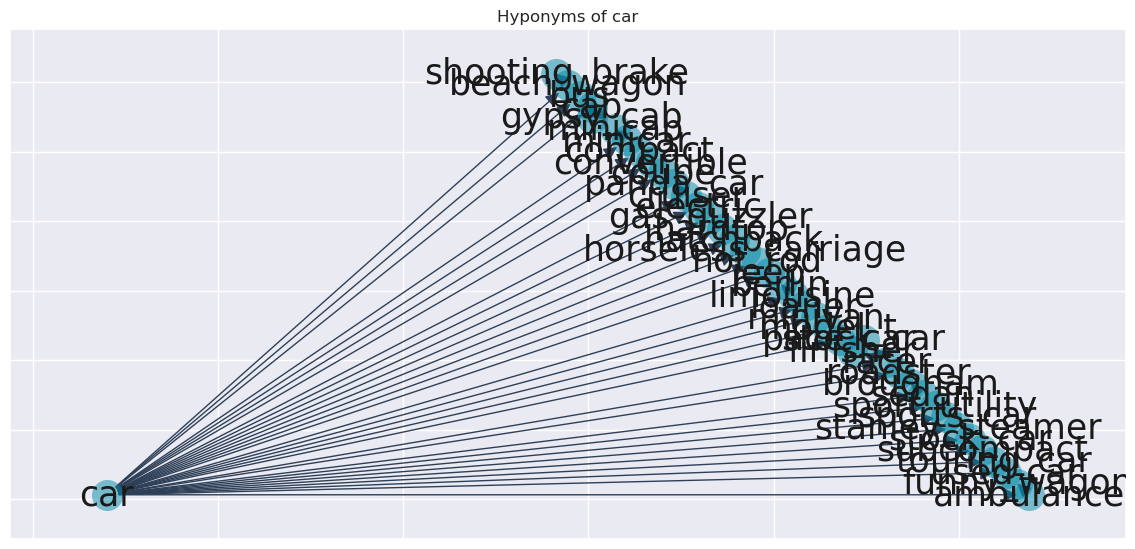

In [243]:
G, labels = closure_graph(ss[0], fn = lambda s: s.hyponyms())
draw_text_graph(G, labels, title = f'Hyponyms of {ss[0].name().split(".")[0]}')

## Hypernyms
Conceptos

In [244]:
print(ss[0].name())
ss[0].hypernyms()[:5]

car.n.01


[Synset('motor_vehicle.n.01')]

In [245]:
## Synsets: Grupo de sinónimos 
ss = wn.synsets('humano', lang = 'spa')
ss

[Synset('person.n.01'),
 Synset('humane.s.03'),
 Synset('erring.s.01'),
 Synset('human.a.03'),
 Synset('human-centered.s.01'),
 Synset('earthborn.s.01'),
 Synset('human.a.01'),
 Synset('human.a.02')]

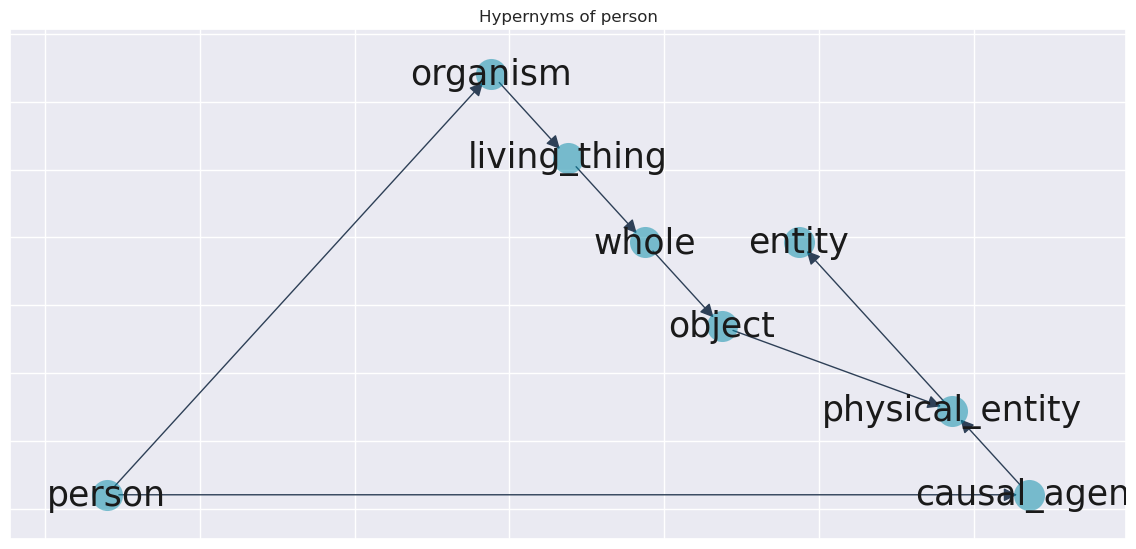

In [246]:
G, labels = closure_graph(ss[0], fn = lambda s: s.hypernyms())
draw_text_graph(G, labels, title = f'Hypernyms of {ss[0].name().split(".")[0]}')